## Васильева Екатерина
## Группа M32081
### Вариант 4


In [133]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv('song_data.csv')
print(data.shape)
data.head()

(18835, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [135]:
df = pd.DataFrame(data, columns=['song_popularity'])
df.dropna()
df

,song_popularity
0,73
1,66
2,76
3,74
4,56
...,...
18830,60
18831,60
18832,23
18833,55


In [136]:
df_list = []
for i in range(len(df)):
    df_list.append(df.iloc[i, 0])

*Задание 1*

Разумно ли популярность песни аппроксимировать нормальным законом?

Допустим, выборка принадлежит нормальному распределению

In [137]:
px.histogram(data, x='song_popularity')

Видим по гистограмме, что распределение может являться нормальным, для проверки построим диаграмму квантиль-квантиль

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([  0,   0,   0, ..., 100, 100, 100], dtype=int64)),
 (21.615933063196252, 52.991876825059734, 0.9866012932290195))

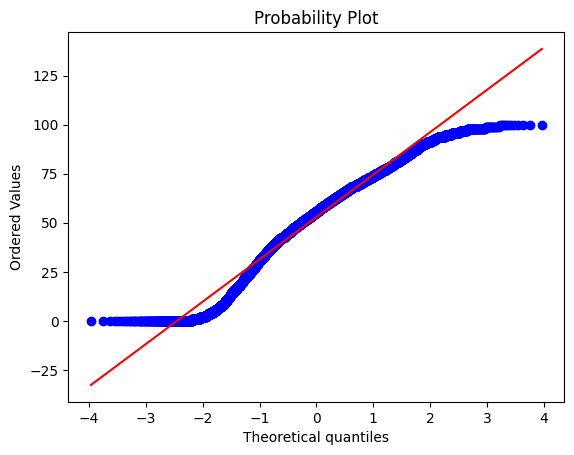

In [138]:
stats.probplot(df_list, dist="norm", plot=plt)

Видим, что выборка не лежит целиком на красной линии, значит распределение не является нормальным

Используем статистический метод - тест Колмогорова-Смирнова

In [139]:
stats.kstest(df_list, 'norm', args=(50, 29.155))

KstestResult(statistic=0.12830284291656052, pvalue=9.182608806621699e-271, statistic_location=43, statistic_sign=-1)

Гипотеза о нормальности отвергается

Тест Шапиро_Вилка

In [140]:
stat, p = stats.shapiro(df['song_popularity'])

if p > 0.05:
    print("Normal")
else:
    print("Not normal")

Not normal


C:\Users\ASUS\PycharmProjects\matstat\venv\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



Видим, что популярность песен точно не распределена нормально, поэтому использовать аппроксимацию нормальным законом не разумно, можно аппроксимировать, например, с помощью логнормального распределения

*Задание 2*

Отличается ли принципиально распределение рейтинга песни в зависимости от продолжительности (разбейте условно на "длинные" и "короткие")?

Требуется проверить: две случайные величины имеют одинаковое распределение
Используем, критерий Колмогорова-Смирнова

In [141]:
border_duration = 235000

In [142]:
stat, p = stats.ks_2samp(data[data['song_duration_ms'] > border_duration]['song_popularity'],data[data['song_duration_ms'] <= border_duration]['song_popularity'])

if p > 0.05:
    print("Same")
else:
    print("Not the same")

Not the same


In [143]:
stat, p = stats.ttest_ind(data[data['song_duration_ms'] > border_duration]['song_popularity'],data[data['song_duration_ms'] <= border_duration]['song_popularity'])

if p > 0.05:
    print("Same")
else:
    print("Not the same")

Not the same


Тесты показали, что выборки длинных и коротких песен имеют разные распределения, значит, можем утверждать, что есть принципиальные отличия в распределении рейтинга песен в зависимости от их длительности

*Задание 3*

Зависит ли популярность песни от продолжительности?

$H_0$ : популярность песни не зависит от ее продолжительности
$H_1$: популярность песни зависит от ее продолжительности

Критерий Спирмена

In [144]:
stat, p = stats.spearmanr(data['song_popularity'], data['song_duration_ms'])

if p > 0.05:
    print("H0")
else:
    print("H1")

H1


In [145]:
stat, p = stats.ttest_ind(data['song_popularity'], data['song_duration_ms'], alternative='two-sided')

if p > 0.05:
    print("H0")
else:
    print("H1")

H1
